In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import *
import pylab as pl
%matplotlib inline

In [2]:
def get_packets(N):
    packets = [random.uniform(0,1) for i in range(int(N))]
    packets = sorted(packets)
    return packets

In [6]:
N = 10.0
p_delay = 0.000001
p = 0.1
start_times = []
#G =  pl.frange(0, 20.1, 0.1)
G = [3]
tputs = []
packets = get_packets(N)
for x in G:
    i = 0
    count = 0
    packets = get_packets(N)
    while i != len(packets)-1:
        j = i+1
        pkt = packets[j]
        while(pkt == packets[j+1]):
            packets.remove(packets[j])
            j += 1
        if packets[i] + (x/N) + p_delay < packets[i+1]:
            if(random.uniform(0,1) < p):
                count += 1
                i += 1
            else:
                packets[i+1] = packets[i] + (x/N)
                #packets = sorted(packets)
        elif packets[i] + (x/N) + p_delay > packets[i+1]:
            packets[i+1] = packets[i] + (x/N)
            if packets[i+1] <= 1:
                packets = sorted(packets)
            else:
                packets.remove(packets[i+1])
                
    tputs.append((count *x) / N)

KeyboardInterrupt: 

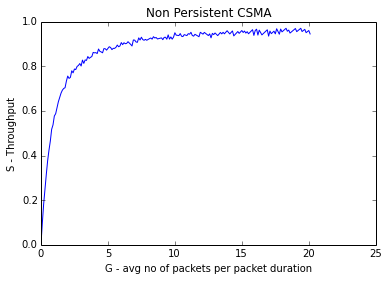

In [133]:
plt.figure()
plt.plot(G, tputs)
plt.xlabel('G - avg no of packets per packet duration')
plt.ylabel('S - Throughput')
plt.title('Non Persistent CSMA')
plt.show()